In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

### Predict the S&P500 - Linear Regression

In [2]:
# Load the data 
df_merged_quandl = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged_quandl = pd.DataFrame(df_merged_quandl[['Date','S&P 500']])
df_merged_quandl['Date'] = pd.to_datetime(df_merged_quandl['Date']) # putting back the day so we have beginning of the month everywhere

#Set the date as index
df_merged_quandl = df_merged_quandl.set_index(pd.DatetimeIndex(df_merged_quandl['Date'].values))
df_merged_quandl

,Date,S&P 500
1871-01-01,1871-01-01,105.76
1871-02-01,1871-02-01,104.02
1871-03-01,1871-03-01,105.01
1871-04-01,1871-04-01,112.01
1871-05-01,1871-05-01,117.56
...,...,...
2022-07-01,2022-07-01,3918.75
2022-08-01,2022-08-01,4167.51
2022-09-01,2022-09-01,3850.52
2022-10-01,2022-10-01,3726.05


In [3]:
# Plot the linear regression line and the close price
df_2 = df_merged_quandl.copy()

# Create a new column called 'Numbers' that ranges from 0 to the length of the data set
df_2['Numbers'] = list(range (0, len(df_2)))

# Store the 'Numbers' column into a variable called 'X' as an array
X = np.array(df_2[['Numbers']])

# Store the close price as an array in a variable called 'Y'
y = df_2['S&P 500'].values

# Create and train the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: -394.0069787366117
Slope: [1.20314758]


C:\Users\rapha\AppData\Local\Temp\ipykernel_35212\500798324.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


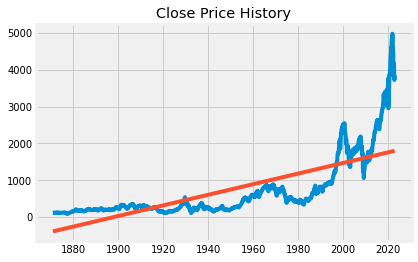

In [4]:
# Prepare the data for visualization 
# Get the predicted prcies from the model and store them into a variable called 'y_pred'

y_pred = lin_model.coef_ * X + lin_model.intercept_ #y - mx + b

# Store the predicted value in a new value called 'Pred'
df_2['Pred'] = y_pred 

# Plot the data

import plotly.express as px
fig = plt.figure()
plt.plot(df_2.index, df_2['S&P 500'])
plt.plot(df_2.index, df_2['Pred'])
plt.title("Close Price History")

fig.show();

In [5]:
# How good is the model ? 

r2_score(df_2['S&P 500'], df_2['Pred'])

0.552511653790886

In [6]:
# Show the possbile price for the next day based on the model
lin_model.coef_ * len(df_2) +1 + lin_model.intercept_

# Price for tomorrow should be 1800...

array([1800.33105884])

### Predict the S&P500 - Linear Regression starting in 1980

In [7]:
df_merged_quandl = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged_quandl = pd.DataFrame(df_merged_quandl[['Date','S&P 500']])
df_merged_quandl.loc[df_merged_quandl['Date'] == '1980-01-01']

,Date,S&P 500
1308,1980-01-01,423.08


In [8]:
df_merged_quandl = df_merged_quandl[1308:]
df_merged_quandl

,Date,S&P 500
1308,1980-01-01,423.08
1309,1980-02-01,433.74
1310,1980-03-01,387.96
1311,1980-04-01,377.42
1312,1980-05-01,390.79
...,...,...
1818,2022-07-01,3918.75
1819,2022-08-01,4167.51
1820,2022-09-01,3850.52
1821,2022-10-01,3726.05


In [9]:
# Set the date as index
df_merged_quandl = df_merged_quandl.set_index(pd.DatetimeIndex(df_merged_quandl['Date'].values))
df_merged_quandl

# Plot the linear regression line and the close price
df_2 = df_merged_quandl.copy()

# Create a new column called 'Numbers' that ranges from 0 to the length of the data set
df_2['Numbers'] = list(range (0, len(df_2)))

# Store the 'Numbers' column into a variable called 'X' as an array
X = np.array(df_2[['Numbers']])

# Store the close price as an array in a variable called 'Y'
y = df_2['S&P 500'].values

# Create and train the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: 84.73236170693167
Slope: [6.2694005]


C:\Users\rapha\AppData\Local\Temp\ipykernel_35212\500798324.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


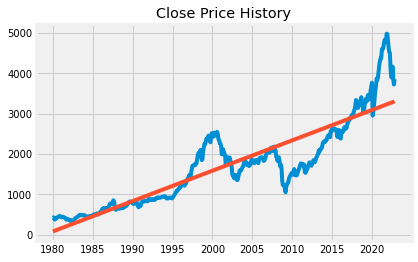

In [10]:
# Prepare the data for visualization 
# Get the predicted prcies from the model and store them into a variable called 'y_pred'

y_pred = lin_model.coef_ * X + lin_model.intercept_ #y - mx + b

# Store the predicted value in a new value called 'Pred'
df_2['Pred'] = y_pred 

# Plot the data

import plotly.express as px
fig = plt.figure()
plt.plot(df_2.index, df_2['S&P 500'])
plt.plot(df_2.index, df_2['Pred'])
plt.title("Close Price History")

fig.show();

In [11]:
# How good is the model ? 

r2_score(df_2['S&P 500'], df_2['Pred'])

0.7920748460606075

In [12]:
# Show the possbile price for the next day based on the model
lin_model.coef_ * len(df_2) +1 + lin_model.intercept_

# price for tomorrow should be 3314...

array([3314.47362132])

### Predict the S&P500 - Linear Regression starting in 2000

In [13]:
df_merged_quandl = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged_quandl = pd.DataFrame(df_merged_quandl[['Date','S&P 500']])
df_merged_quandl.loc[df_merged_quandl['Date'] == '2000-01-01']

,Date,S&P 500
1548,2000-01-01,2506.67


In [14]:
df_merged_quandl = df_merged_quandl[1548:]
df_merged_quandl

,Date,S&P 500
1548,2000-01-01,2506.67
1549,2000-02-01,2427.73
1550,2000-03-01,2500.35
1551,2000-04-01,2532.07
1552,2000-05-01,2454.91
...,...,...
1818,2022-07-01,3918.75
1819,2022-08-01,4167.51
1820,2022-09-01,3850.52
1821,2022-10-01,3726.05


In [15]:
#Set the date as index
df_merged_quandl = df_merged_quandl.set_index(pd.DatetimeIndex(df_merged_quandl['Date'].values))
df_merged_quandl

# Plot the linear regression line and the close price
df_2 = df_merged_quandl.copy()

#Create a new column called 'Numbers' that ranges from 0 to the length of the data set
df_2['Numbers'] = list(range (0, len(df_2)))

#Store the 'Numbers' column into a variable called 'X' as an array
X = np.array(df_2[['Numbers']])

#Store the close price as an array in a variable called 'Y'
y = df_2['S&P 500'].values

#Create and train the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: 1217.8479343873514
Slope: [8.53607639]


C:\Users\rapha\AppData\Local\Temp\ipykernel_35212\822655860.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


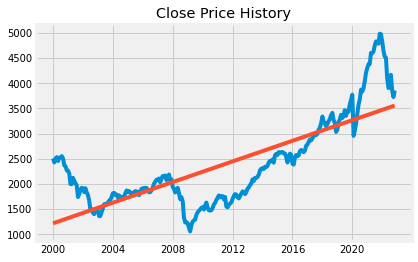

In [16]:
#Prepare the data for visualization 
# Get the predicted prcies from the model and store them into a variable called 'y_pred'

y_pred = lin_model.coef_ * X + lin_model.intercept_ #y - mx + b


#Store the predicted value in a new value called 'Pred'
df_2['Pred'] = y_pred

#Plot the data

import plotly.express as px
fig = plt.figure()
plt.plot(df_2.index, df_2['S&P 500'])
plt.plot(df_2.index, df_2['Pred'])
plt.title("Close Price History")
fig.show();

In [17]:
#How good is the model ? 

r2_score(df_2['S&P 500'], df_2['Pred'])

0.5814238547492765

In [18]:
# Show the possbile price for the next day based on the model
lin_model.coef_ * len(df_2) +1 + lin_model.intercept_

# price for tomorrow should be 3865...

array([3566.268942])

### Predict the S&P500 - Linear Regression starting in March 2008

In [19]:
df_merged_quandl = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged_quandl = pd.DataFrame(df_merged_quandl[['Date','S&P 500']])
df_merged_quandl.loc[df_merged_quandl['Date'] == '2008-03-01']

,Date,S&P 500
1646,2008-03-01,1830.57


In [20]:
df_merged_quandl = df_merged_quandl[1644:]
df_merged_quandl

,Date,S&P 500
1644,2008-01-01,1938.73
1645,2008-02-01,1899.62
1646,2008-03-01,1830.57
1647,2008-04-01,1893.50
1648,2008-05-01,1922.55
...,...,...
1818,2022-07-01,3918.75
1819,2022-08-01,4167.51
1820,2022-09-01,3850.52
1821,2022-10-01,3726.05


In [21]:
#Set the date as index
df_merged_quandl = df_merged_quandl.set_index(pd.DatetimeIndex(df_merged_quandl['Date'].values))
df_merged_quandl

# Plot the linear regression line and the close price
df_2 = df_merged_quandl.copy()

#Create a new column called 'Numbers' that ranges from 0 to the length of the data set
df_2['Numbers'] = list(range (0, len(df_2)))

#Store the 'Numbers' column into a variable called 'X' as an array
X = np.array(df_2[['Numbers']])

#Store the close price as an array in a variable called 'Y'
y = df_2['S&P 500'].values

#Create and train the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: 1021.8981191806326
Slope: [18.19353001]


C:\Users\rapha\AppData\Local\Temp\ipykernel_35212\822655860.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


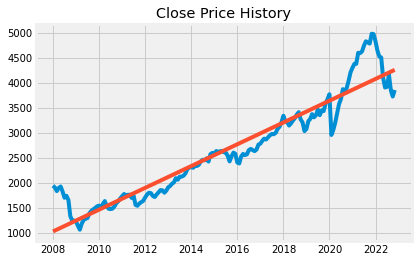

In [22]:
#Prepare the data for visualization 
# Get the predicted prcies from the model and store them into a variable called 'y_pred'

y_pred = lin_model.coef_ * X + lin_model.intercept_ #y - mx + b


#Store the predicted value in a new value called 'Pred'
df_2['Pred'] = y_pred

#Plot the data

import plotly.express as px
fig = plt.figure()
plt.plot(df_2.index, df_2['S&P 500'])
plt.plot(df_2.index, df_2['Pred'])
plt.title("Close Price History")
fig.show();

In [23]:
#How good is the model ? 

r2_score(df_2['S&P 500'], df_2['Pred'])

0.8979064483270867

In [24]:
# Show the possbile price for the next day based on the model
lin_model.coef_ * len(df_2) +1 + lin_model.intercept_

# price for tomorrow should be 3865...

array([4279.53999184])